<a href="https://colab.research.google.com/github/drv-j/ACMDIGW/blob/ML/ACMDIGT223_24_ML_JACINTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Standard DS workflow**


1.   Mount drive
2.   Load Libraries
3.   Load dataset
4.   Exploratory data analysis (EDA)
5.   Data cleaning
6.   Data visualization List item
7.   Data preprocessing
8.   Machine learning



In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Libraries

In [30]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [3]:
# load file
file = ('/content/drive/MyDrive/Colab Notebooks/Dataset/Human_Resources.csv')

# create variable for dataset
df = pd.read_csv(file)
# check the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [4]:
# check the shape of the df
df.shape
# the dataframe has 1470 rows x 35 cols

(1470, 35)

In [5]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# check for duplicate data
df.duplicated().sum()
# the df has no duplicated

0

In [7]:
# check for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# check for statistics for outliers
df.describe()
# the difference between 75% and max (should not be big)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Visualization

In [9]:
# check cols
df.columns
# what should we drop?

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# irrelevant cols
# Over18, EmployeeNumber, StandardHours, EmployeeCount
df.drop(columns = ['Over18','EmployeeNumber','StandardHours','EmployeeCount'], inplace = True)

In [11]:
#  categorical encoding
df['Attrition']= df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime']= df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)


In [12]:
# check values
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [13]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

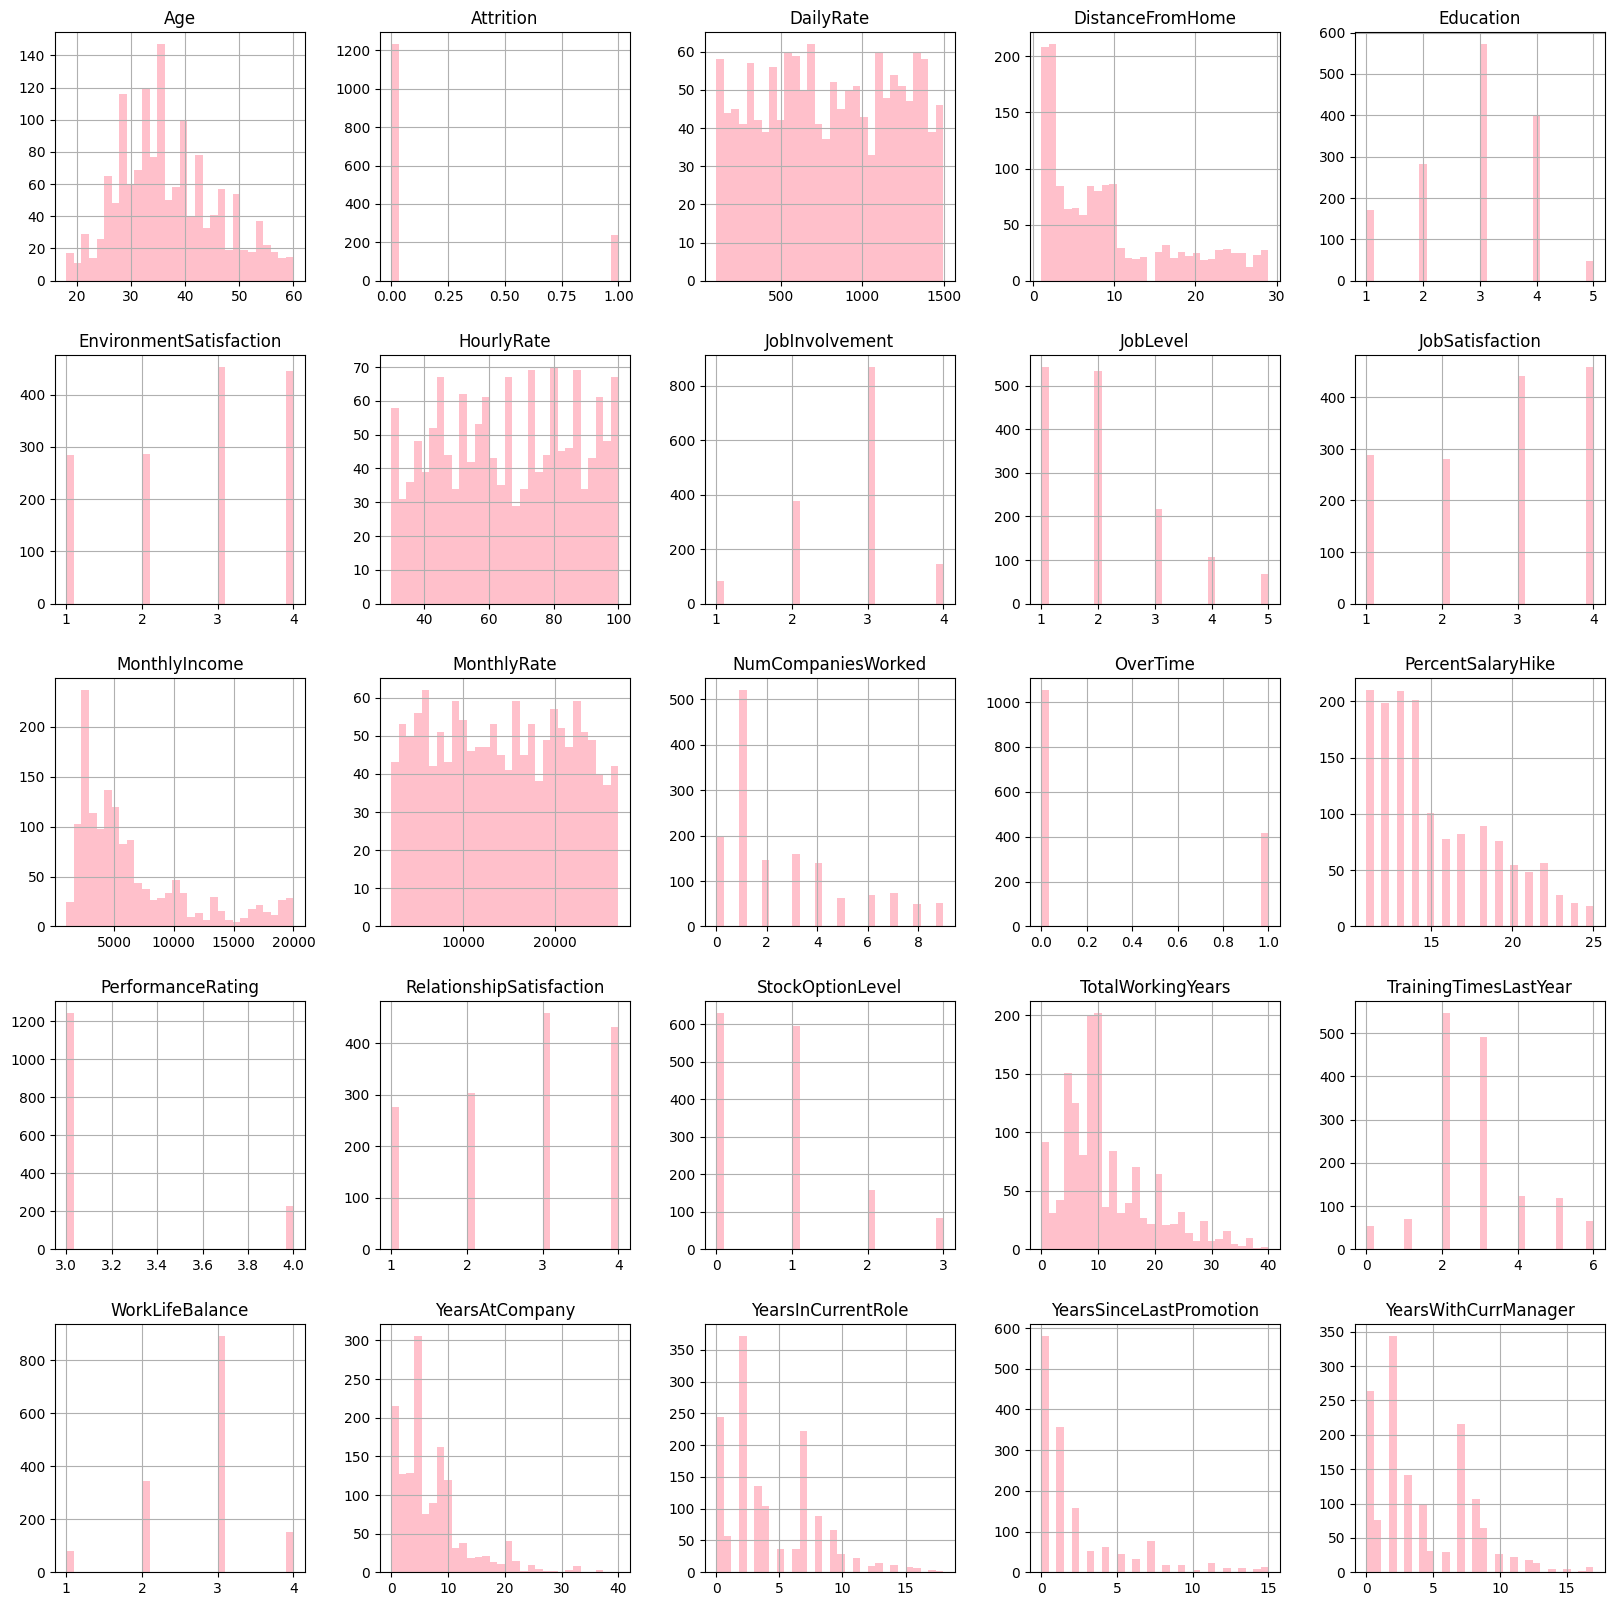

In [14]:
# create a histogram
df.hist(bins = 30, figsize = (20,20), color = 'pink');

In [15]:
# create a filter of how many employees left vs stayed
emp_left = df[df['Attrition'] == 1]
emp_stay = df[df['Attrition'] == 0]

In [16]:
print(f'employees that left MSFT = {len(emp_left)}')
print(f'employees that stay in MSFT = {len(emp_stay)}')
print(f'% attrition {len(emp_left)/ len(df) * 100}%')

employees that left MSFT = 237
employees that stay in MSFT = 1233
% attrition 16.122448979591837%


<ipython-input-17-4848cc47e908>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


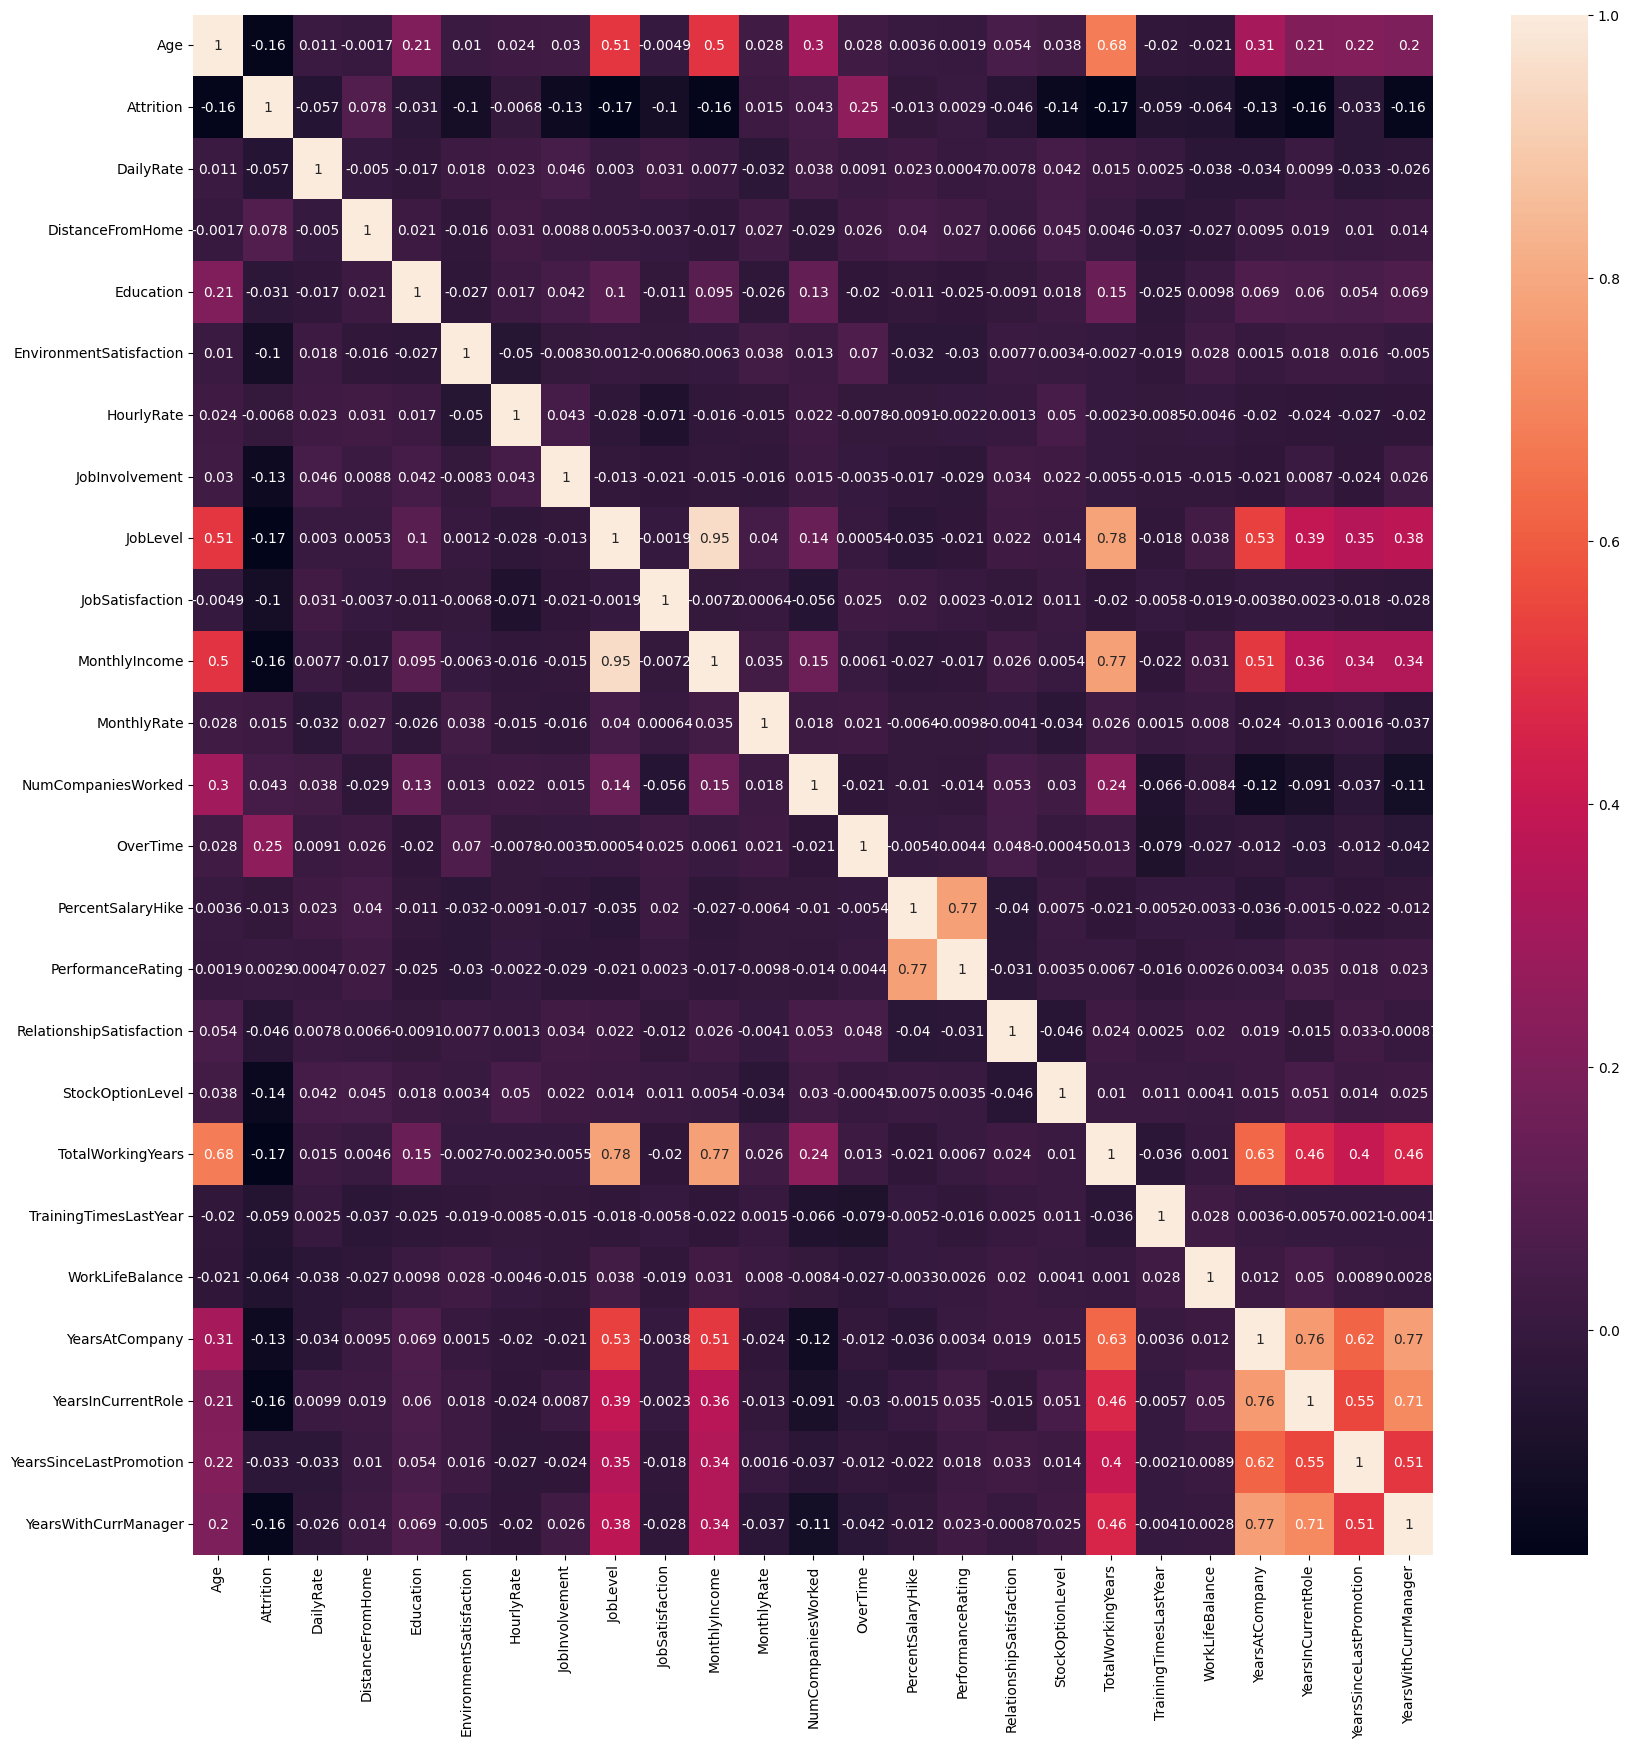

In [17]:
# create a correlation matrix
corr = df.corr()

# create a heatmap
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr,annot = True);

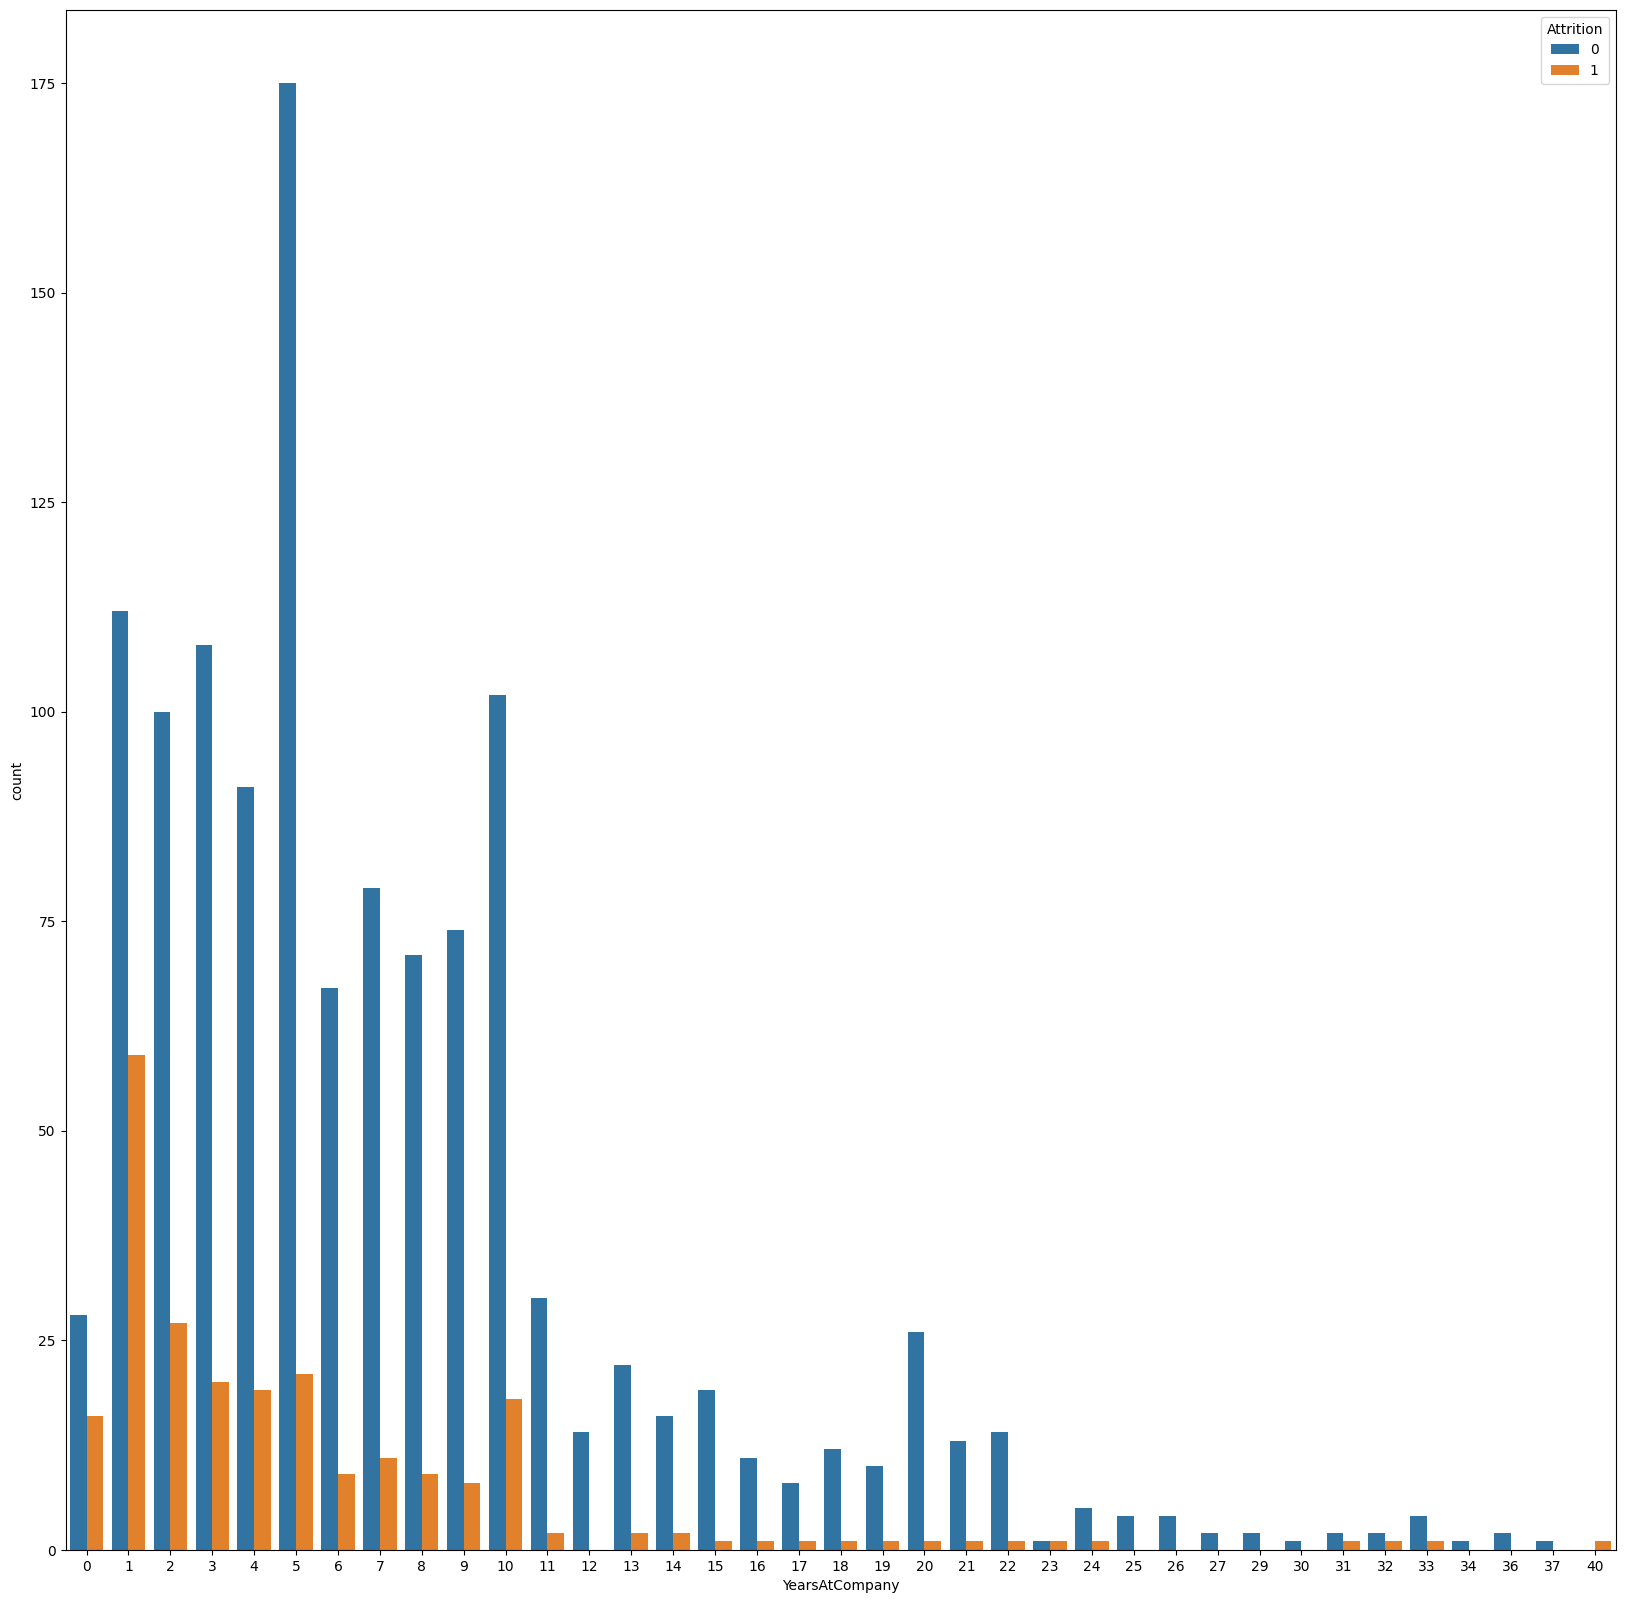

In [18]:
# create a countplot
plt.figure(figsize = [20,20])
sns.countplot(data = df, x = 'YearsAtCompany', hue = 'Attrition');

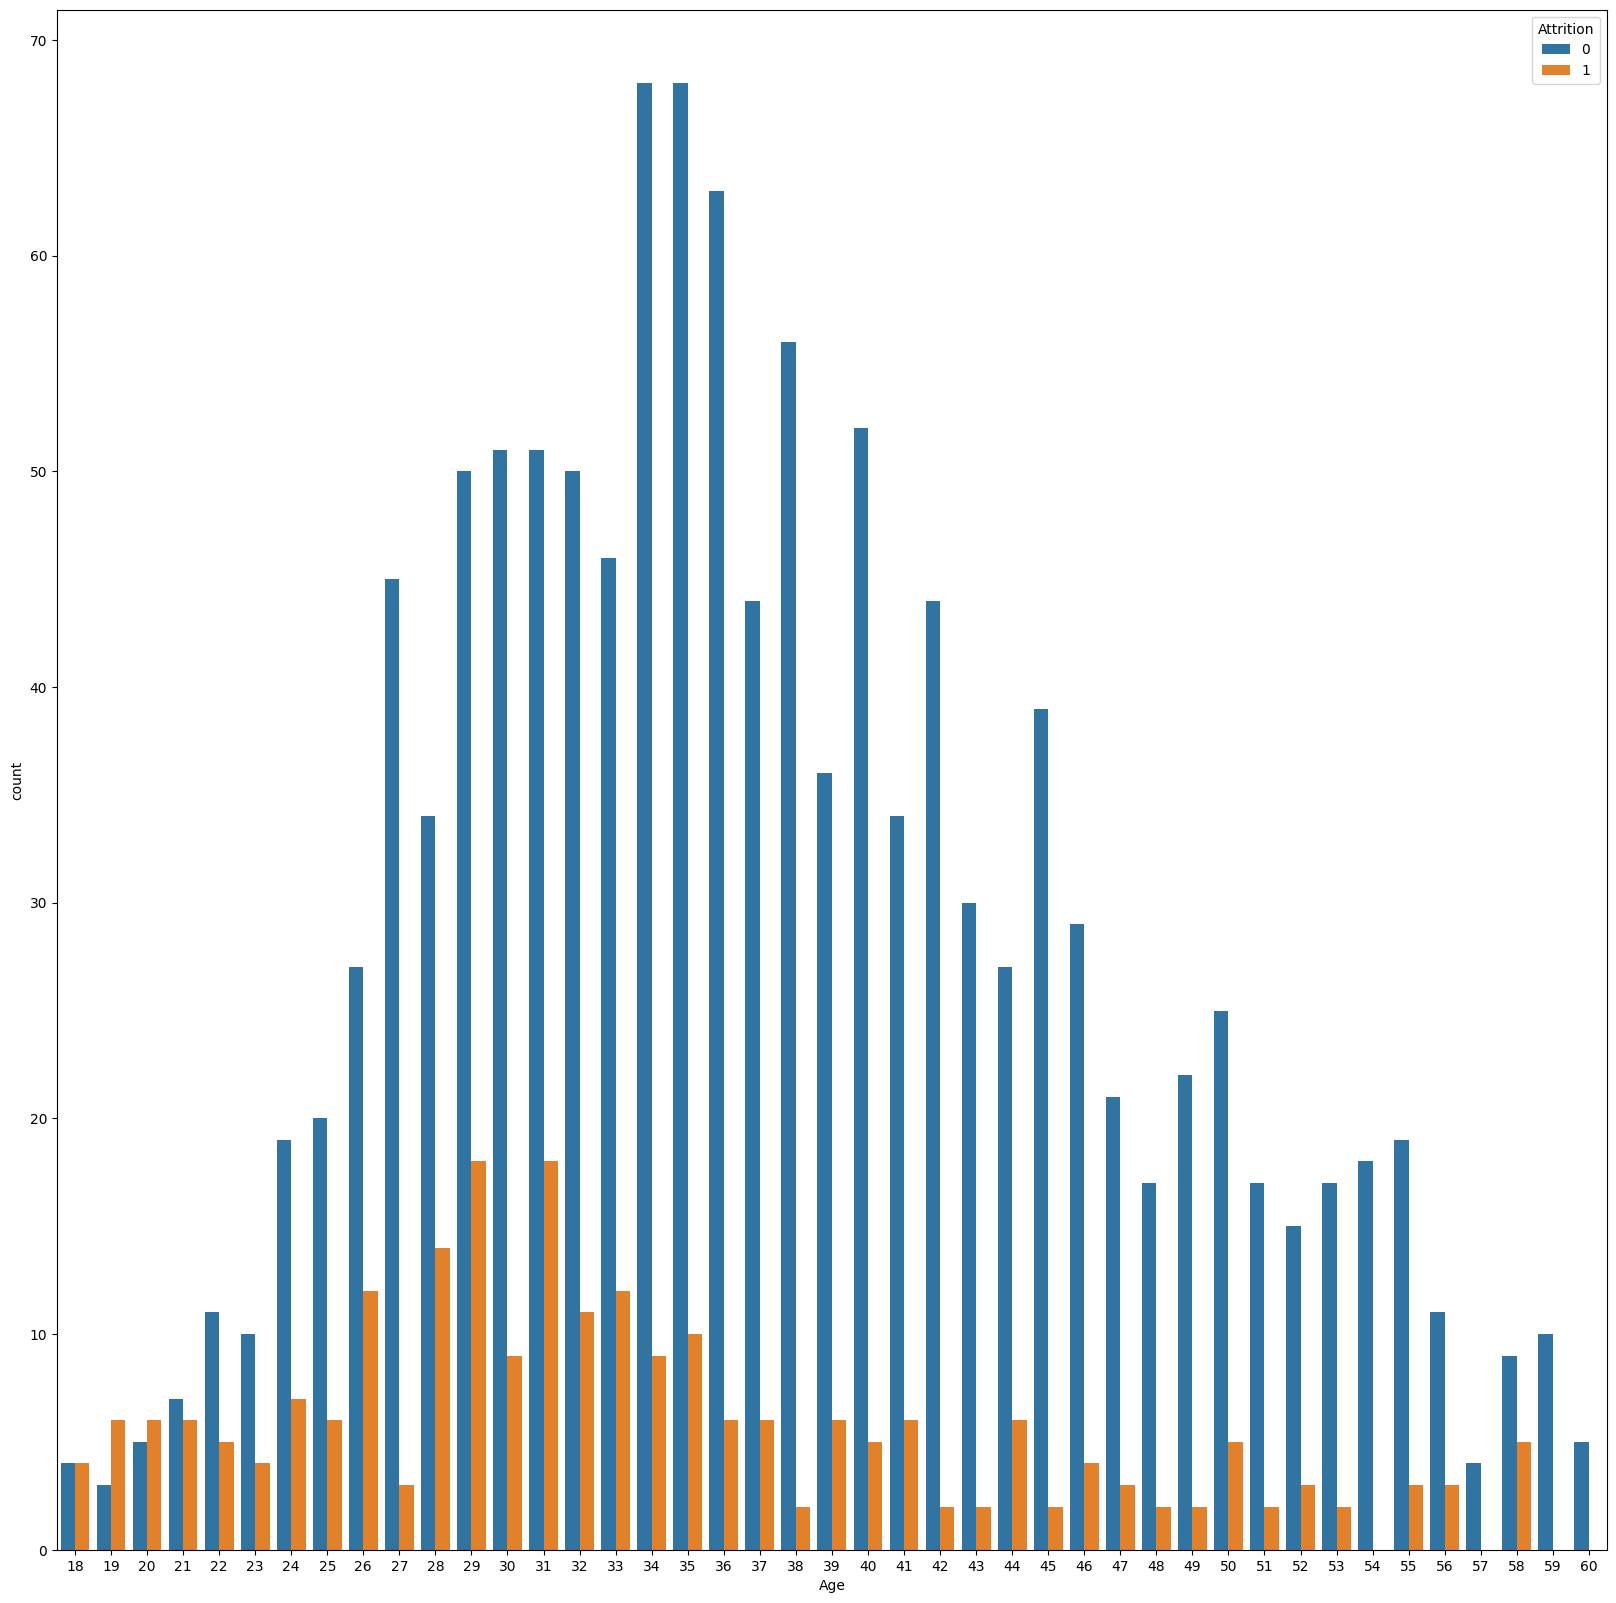

In [19]:
# create a countplot
plt.figure(figsize = [20,20])
sns.countplot(data = df, x = 'Age', hue = 'Attrition');

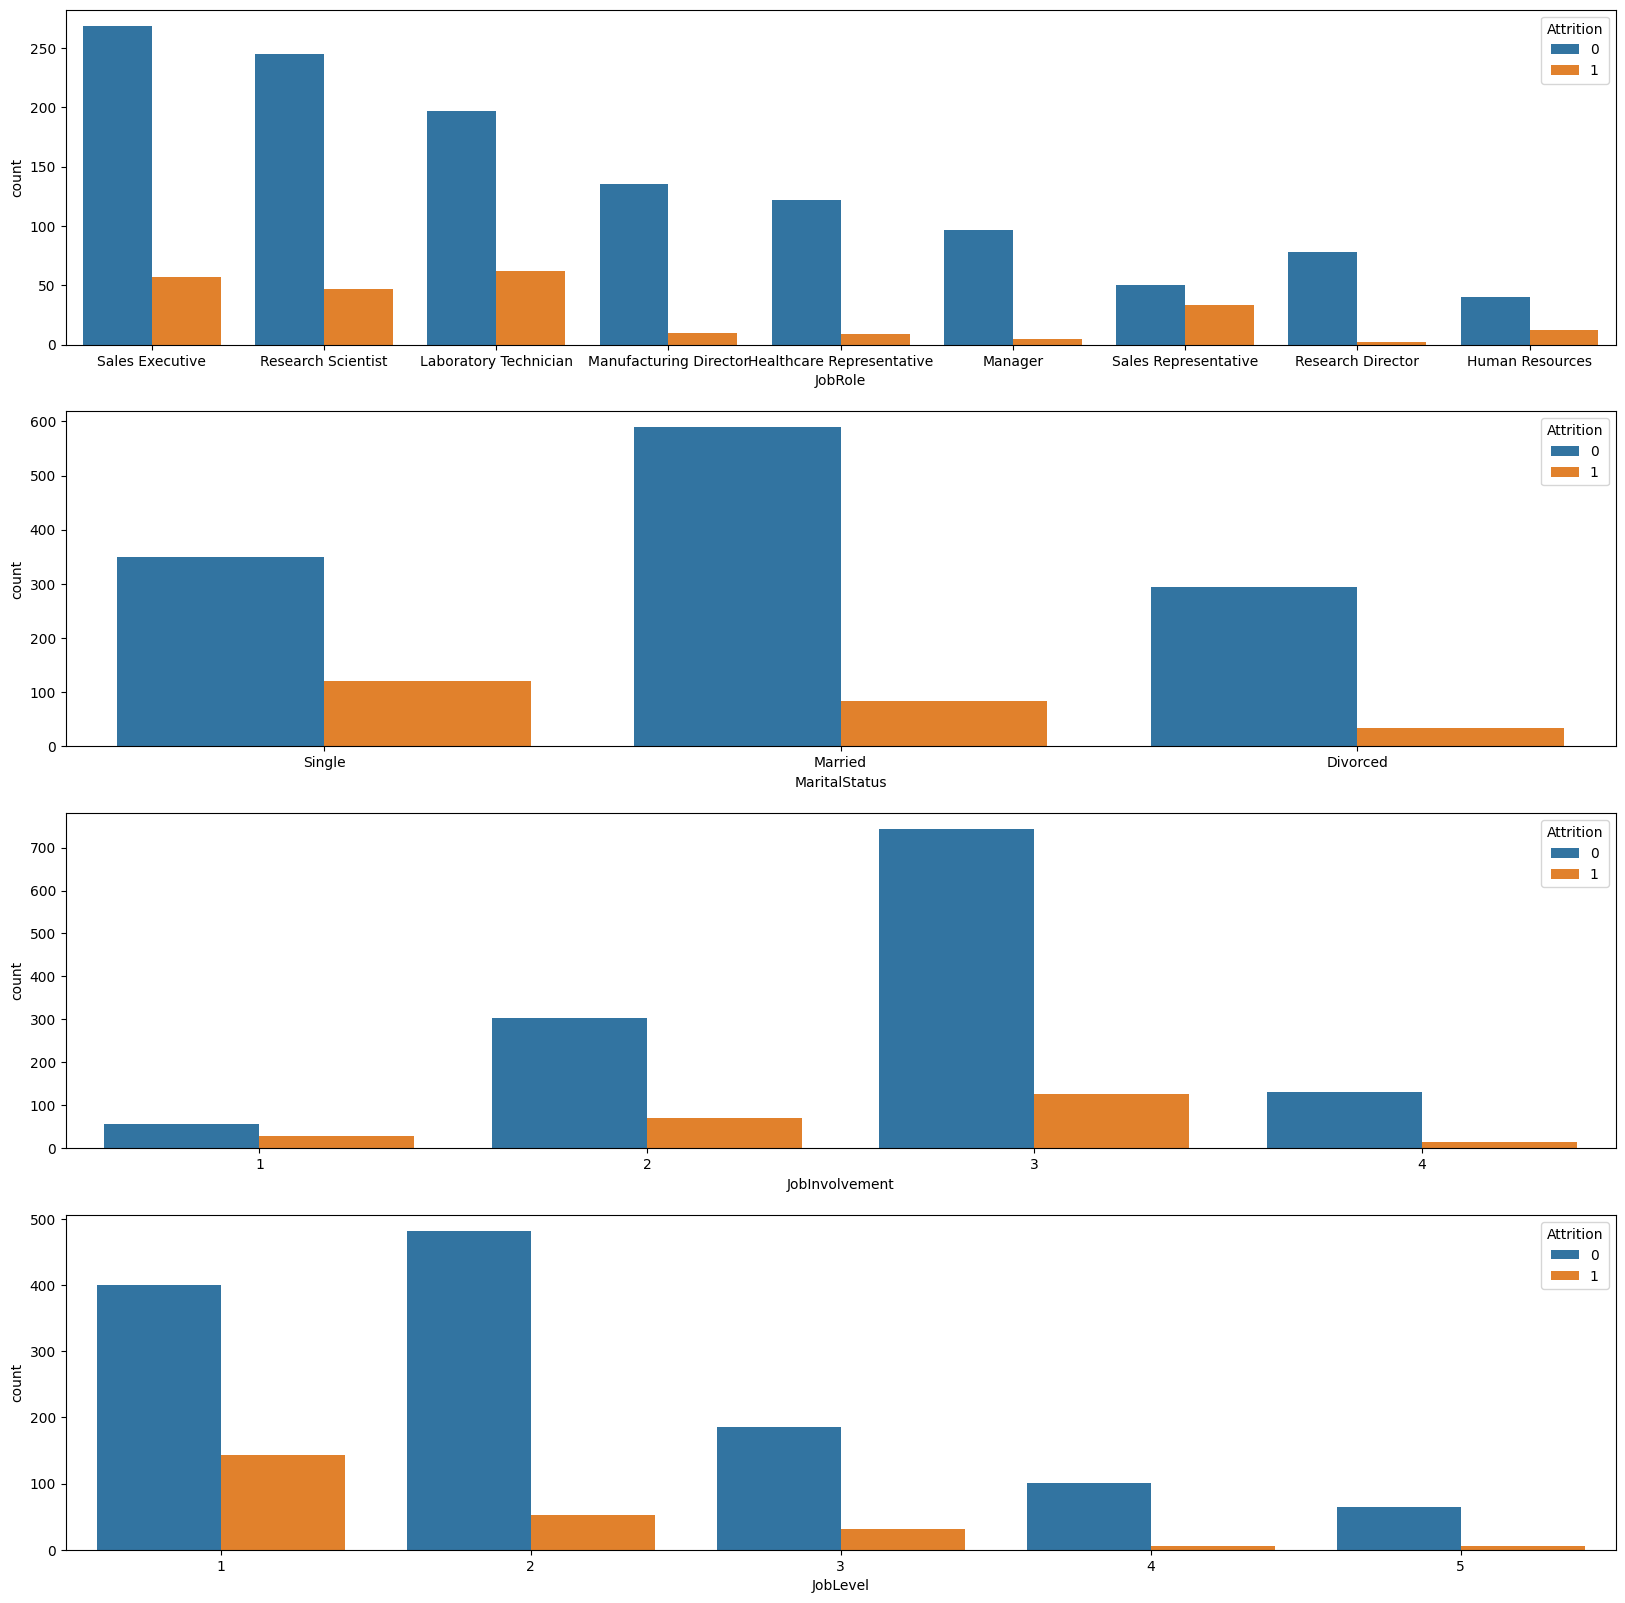

In [20]:
# plot comparison
plt.figure(figsize = [20,20])

plt.subplot (411)
sns.countplot(data = df, x = 'JobRole', hue = 'Attrition')

plt.subplot (412)
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Attrition')

plt.subplot (413)
sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.subplot (414)
sns.countplot(data = df, x = 'JobLevel', hue = 'Attrition');


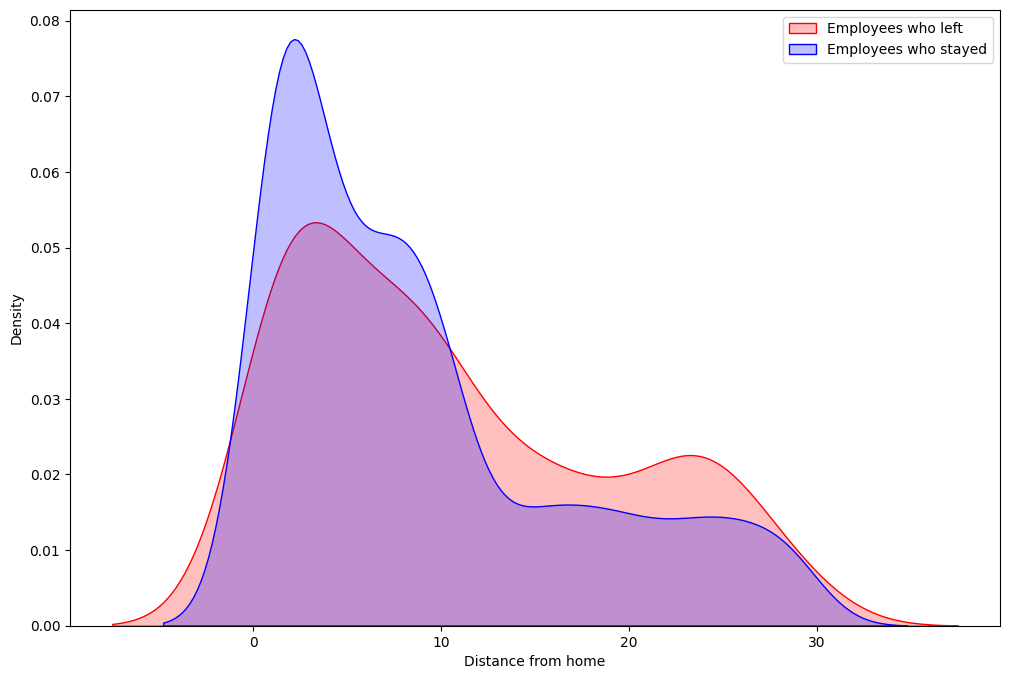

In [24]:
# visualize the distance from home against those employees who left vs who stayed using a kernel density estimate
plt.figure(figsize = (12,8))
sns.kdeplot(emp_left['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(emp_stay['DistanceFromHome'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Distance from home')
plt.legend();

#explanation: If you look at the blue it represents those who stayed.
#If you can see the density is highest around the 5 miles mark, indicating that those closer to home are more likely to stay
#While those who left (in red) as slightly further from home

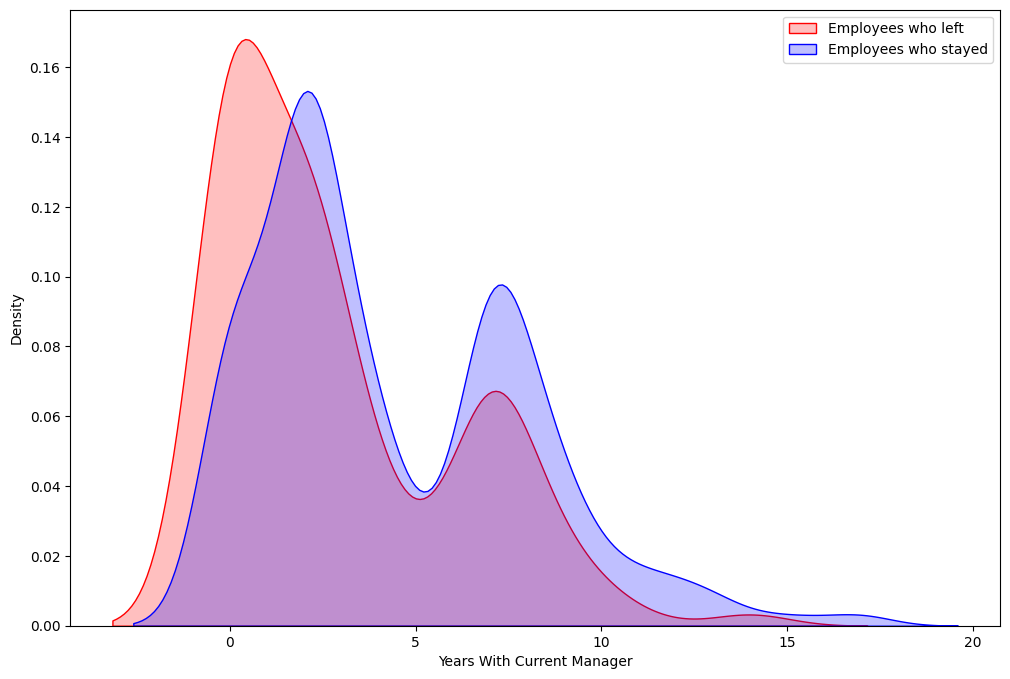

In [26]:
# compare the difference between employees who stayed  vs those left relative to their time with manager
plt.figure(figsize = (12,8))
sns.kdeplot(emp_left['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(emp_stay['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Years With Current Manager')
plt.legend();

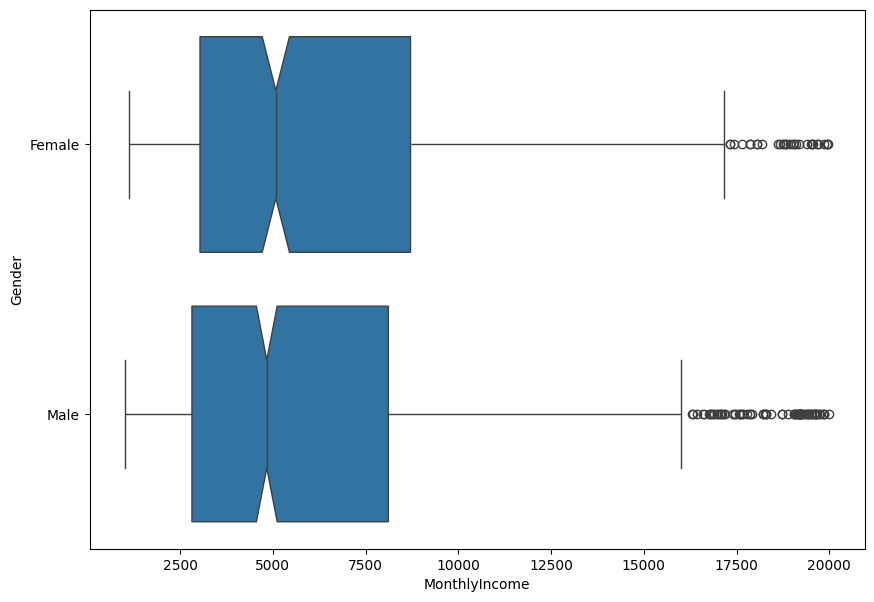

In [27]:
# use a box plot to visualize gender vs income
plt.figure(figsize = (10,7))
sns.boxplot(data = df, x = 'MonthlyIncome', y = 'Gender', notch = True);
#distribution plot na top view

# Data Preprocessing

prep the data for machine learning

In [29]:
# determine target variable y and features X
y = df['Attrition']# we will take with col for the model to predict
X = df.drop(columns = 'Attrition') # we will use col EXCEPT Attrition for the model to learn from
# capital X rational: features will be X because this is a matrix (several columns and rows; 1470 x 30 matrix because we droped Attrition (target var))

X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


# Split the dataset

create a traning and testing set.

processing will only be done on the traning set to avoid data leakage

In [32]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

# Prepare the data

In [33]:
# create the col selectors
num_selector = make_column_selector(dtype_include = 'number') #take all the column features with numbers
obj_selector = make_column_selector(dtype_include = 'object')

In [36]:
# create the encoders
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore') #takes object selector and makes them numbers
scaler = StandardScaler() #makes them uniform

In [35]:
# create the imputer
mean_imputer = SimpleImputer(strategy = 'mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')

# Create pipeline for numeric and object columns

In [37]:
# think of it like an assembly line
obj_pipe = make_pipeline(freq_imputer, ohe)
num_pipe = make_pipeline(mean_imputer, scaler)

In [38]:
# create tuple
obj_tuple = (obj_pipe, obj_selector)
num_tuple = (num_pipe, num_selector)

In [40]:
#create transformer
preprocessor = make_column_transformer(obj_tuple, num_tuple, remainder = 'passthrough')

In [41]:
# fit the data for machine learning
preprocessor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b6d91f47460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b6d91f45c00>)])

# Transform the dataset

In [68]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Machine Learning

In [69]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
set_config(display = 'diagram')
# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [70]:
# define metrics
# accuracy, recall, precision, F1 score
def evaluate_classification(y_true, y_predicted, average = None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average = average)
  precision = precision_score(y_true, y_predicted, average = average)
  f1 = f1_score(y_true, y_predicted, average = average)

  print(f'Accuracy: {accuracy} \n Recall: {recall} \n Precision: {precision} \n F1 Score: {f1}')

In [71]:
# create the decision tree model
dec_tree = DecisionTreeClassifier()

In [72]:
# fit the model
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier()

In [73]:
# create prediction
train_score = dec_tree.score(X_train_processed, y_train)
print(f'train score {train_score}')
test_score = dec_tree.score(X_test_processed, y_test)
print(f'train score {test_score}')


train score 1.0
train score 0.779891304347826


this model is an overfit

In [74]:
# run classification report
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)
print('training scores')
print(classification_report(y_train, train_preds))
print('testing scores')
print(classification_report(y_test, test_preds))

training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       189

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

testing scores
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       320
           1       0.23      0.29      0.26        48

    accuracy                           0.78       368
   macro avg       0.56      0.57      0.56       368
weighted avg       0.80      0.78      0.79       368



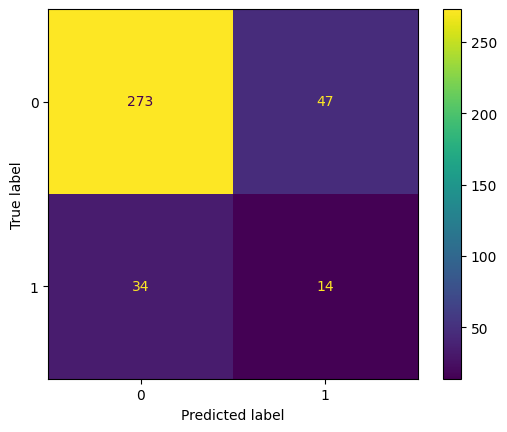

In [76]:
# create the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds);
# yellow = true positive (will stay and stayed)
# Dark purple = True negative (will leave and left)
# type 2 error: false error (2) (will stayed but left)
# type 1 error: false positive (47) (will leave but stayed)

# KNN Classifer

In [77]:
#create the model
knn = KNeighborsClassifier()


In [79]:
# fit the model
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [80]:
# create prediction
train_score = knn.score(X_train_processed, y_train)
print(f'train score {train_score}')
test_score = knn.score(X_test_processed, y_test)
print(f'train score {test_score}')

train score 0.8666061705989111
train score 0.8804347826086957


In [81]:
# run classification report
train_preds = knn.predict(X_train_processed)
test_preds = knn.predict(X_test_processed)
print('training scores')
print(classification_report(y_train, train_preds))
print('testing scores')
print(classification_report(y_test, test_preds))

training scores
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       913
           1       0.85      0.27      0.41       189

    accuracy                           0.87      1102
   macro avg       0.86      0.63      0.67      1102
weighted avg       0.86      0.87      0.84      1102

testing scores
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       320
           1       0.70      0.15      0.24        48

    accuracy                           0.88       368
   macro avg       0.79      0.57      0.59       368
weighted avg       0.86      0.88      0.84       368



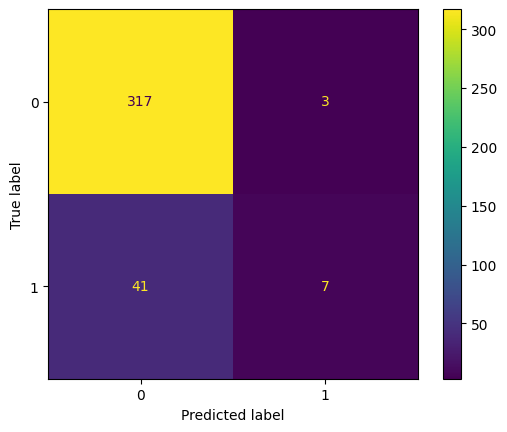

In [82]:
# create the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds);